# 1. Import: 
## 1.1 Import libraries and datasets

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [4]:
# Read styleData1.csv into a dataframe called style
style = pd.read_csv("styleData1.csv")
style.head() 

,Style,StyleID
0,Altbier,1
1,Alternative Grain Beer,2
2,Alternative Sugar Beer,3
3,American Amber Ale,4
4,American Barleywine,5


In [5]:
# Read recipeData1.csv into a dataframe called beer
beer = pd.read_csv('recipeData1.csv')
beer.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50,1.060,1.010,6.48,17.84,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


# 2. Explore the datasets

## 2.1 Column Names

In [6]:
# Take a look at the column names of beer dataset
list(beer.columns.values)

['BeerID',
 'Name',
 'URL',
 'Style',
 'StyleID',
 'Size(L)',
 'OG',
 'FG',
 'ABV',
 'IBU',
 'Color',
 'BoilSize',
 'BoilTime',
 'BoilGravity',
 'Efficiency',
 'MashThickness',
 'SugarScale',
 'BrewMethod',
 'PitchRate',
 'PrimaryTemp',
 'PrimingMethod',
 'PrimingAmount']

### >> We can see the 'beer' dataset has several different column contents, and by scanning these names, we can easily get some meanings of them. Meanwhile, the 'style' dataset was easily seen from the first step that it has only 'style' and 'style ID'. 

### >> Little about brewing: 
Beer is made from four basic ingredients: barley, water, hops and yeast. The basic idea is to extract the sugars from grains (usually barley) so that the yeast can turn it into alcohol and CO2, creating beer. The brewing process starts with grains, usually barley (although sometimes wheat, rye or other such things.)
Brewing process may include malting, mashing, lautering, boiling, fermenting, conditioning, filtering, and packaging. 

## 2.2 How many rows/records

In [7]:
#how many rows in beer dataset
len(beer.index)

65499

In [8]:
#how many columns in beer dataset
len(beer.columns)

22

In [9]:
#how many rows in style dataset
len(style.index)

176

### >>Now we get a sense of these two datasets that 'beer' has about 65000 rows with 22 columns, and 'style' has 176 rows which means there are 176 styles of beers in the datasets. 

## 2.3 Missing Values

In [10]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 22 columns):
BeerID           65499 non-null int64
Name             65498 non-null object
URL              65499 non-null object
Style            64958 non-null object
StyleID          65499 non-null int64
Size(L)          65499 non-null object
OG               65499 non-null float64
FG               65499 non-null float64
ABV              65499 non-null float64
IBU              65499 non-null object
Color            65499 non-null float64
BoilSize         65499 non-null object
BoilTime         65499 non-null int64
BoilGravity      62512 non-null float64
Efficiency       65499 non-null float64
MashThickness    38651 non-null float64
SugarScale       65499 non-null object
BrewMethod       65499 non-null object
PitchRate        30904 non-null float64
PrimaryTemp      45753 non-null float64
PrimingMethod    6191 non-null object
PrimingAmount    4387 non-null object
dtypes: float64(9), int64(3),

### We can easily see that 'Style ID', 'Size', 'OG', 'FG', 'ABV', 'IBU', 'Color', 'SugarScale', 'BrewMethod', 'Efficiency' don't contain any missing values (they all contain 65499 values), so we could focus on these data first, to explore some interesting findings. And we can see that Name, Style, Size, IBU, SugarScale, BrewMethod are 'object' type, while OG, FG, ABV, Color, Efficiency are 'float' type. 

### So far, we can see that 'style' dataset is useful only when we are going to use 'Style ID' data, while 'Style' column has hundreds of missing values. So it is a good news that we could use 'Style ID' in beer dataset to find out all the style information from 'style' dataset. 

## 2.4 Some more exploration about columns

### >> Some research about column names: 
>'OG' is Original Gravity，the specific gravity of the unfermented wort. The primary contribution to specific gravity is sugar, some of which is fermented into alcohol, and some of which remains in the finished beer to give sweetness and body. Typically, above 1.075 OG is considered high. It is ready to use since it is a float type in the dataset. 

>'FG' is Final Gravity. It is ready to use since it is a float type in the dataset. 

>'ABV' is Alcohol By Volume. This number simply lets you know what percentage of your beer is alcohol. It is ready to use since it is a float type in the dataset. 

>'IBU' is International Bitterness Units scale, that goes from 1 to 100, and measures the amount of isomerized alpha acids in a beer. It is not ready to use yet, since it is a object type in the dataset, so we want to convert the type to float. 

>'Color' is a float type, so it is ready to use. But we have to know the number range and how the numbers represent the color. 

>'SugarScale' is a object type, so we would explore more about how to use it. 

>'BrewMethod' is a object type, so we would explore more about how to use it. 

>'Efficiency' is a float type, so it is ready to use. But we have to understand what it means. 

# 3. Clean the data

## 3.1 Merge two datasets to make up all the missing values in 'Style' and remove unwanted columns

In [49]:
# Merge the 'style' dataset to 'beer' based on the column 'Style ID'
beer_full = beer.merge(style, on=['StyleID'])
beer_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65499 entries, 0 to 65498
Data columns (total 23 columns):
BeerID           65499 non-null int64
Name             65498 non-null object
URL              65499 non-null object
Style_x          64958 non-null object
StyleID          65499 non-null int64
Size(L)          65499 non-null object
OG               65499 non-null float64
FG               65499 non-null float64
ABV              65499 non-null float64
IBU              65499 non-null object
Color            65499 non-null float64
BoilSize         65499 non-null object
BoilTime         65499 non-null int64
BoilGravity      62512 non-null float64
Efficiency       65499 non-null float64
MashThickness    38651 non-null float64
SugarScale       65499 non-null object
BrewMethod       65499 non-null object
PitchRate        30904 non-null float64
PrimaryTemp      45753 non-null float64
PrimingMethod    6191 non-null object
PrimingAmount    4387 non-null object
Style_y          64958 non-nu

In [99]:
# Only keep the data we want
beer_clean = beer_full.drop(['URL','Style_x','StyleID','PrimaryTemp','PitchRate','PitchRate','PrimingMethod','PrimingAmount','MashThickness','BoilGravity'],axis=1)
beer_clean.head()

,BeerID,Name,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency,SugarScale,BrewMethod,Style_y
0,1,Vanilla Cream Ale,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,70.0,Specific Gravity,All Grain,Cream Ale
1,8,Spotted Clown (New Glarus Spotted Cow clone),20.82,1.054,1.014,5.36,19.97,5.94,28.39,75,70.0,Specific Gravity,All Grain,Cream Ale
2,43,Vanilla Caramel Cream Ale,18.93,1.055,1.014,5.43,33.67,10.08,15.14,60,70.0,Specific Gravity,extract,Cream Ale
3,200,Cream of Three Crops,20.82,1.044,1.012,4.15,18.13,2.56,17.03,90,75.0,Specific Gravity,BIAB,Cream Ale
4,244,Sleeman Cream Ale Clone,20.8,1.055,1.015,5.22,19.73,4.74,28.4,60,70.0,Specific Gravity,All Grain,Cream Ale


In [90]:
beer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65499 entries, 0 to 65498
Data columns (total 14 columns):
BeerID        65499 non-null int64
Name          65498 non-null object
Size(L)       65499 non-null object
OG            65499 non-null float64
FG            65499 non-null float64
ABV           65499 non-null float64
IBU           65499 non-null object
Color         65499 non-null float64
BoilSize      65499 non-null object
BoilTime      65499 non-null int64
Efficiency    65499 non-null float64
SugarScale    65499 non-null object
BrewMethod    65499 non-null object
Style_y       64958 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 7.5+ MB


### >> We found that the 'Style' still only contains 64958 values. Let's find out why. 

In [75]:
missingID = beer[beer['Style'].isnull()]['StyleID']
pd.unique(missingID)

array([111])

In [67]:
style[style['StyleID']==111]

,Style,StyleID
110,NaN,111


### >> We can see that the StyleID 111 in Style dataset is also a NaN. So we should delete these data in beer_clean. 

In [100]:
# Rename the 'Style_y' to 'Style' to easy understand 
beer_clean = beer_clean.rename(columns={'Style_y': 'Style'})
beer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65499 entries, 0 to 65498
Data columns (total 14 columns):
BeerID        65499 non-null int64
Name          65498 non-null object
Size(L)       65499 non-null object
OG            65499 non-null float64
FG            65499 non-null float64
ABV           65499 non-null float64
IBU           65499 non-null object
Color         65499 non-null float64
BoilSize      65499 non-null object
BoilTime      65499 non-null int64
Efficiency    65499 non-null float64
SugarScale    65499 non-null object
BrewMethod    65499 non-null object
Style         64958 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 7.5+ MB


In [101]:
beer_clean=beer_clean[beer_clean['Style'].isnull()==False]
beer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64958 entries, 0 to 65498
Data columns (total 14 columns):
BeerID        64958 non-null int64
Name          64957 non-null object
Size(L)       64958 non-null object
OG            64958 non-null float64
FG            64958 non-null float64
ABV           64958 non-null float64
IBU           64958 non-null object
Color         64958 non-null float64
BoilSize      64958 non-null object
BoilTime      64958 non-null int64
Efficiency    64958 non-null float64
SugarScale    64958 non-null object
BrewMethod    64958 non-null object
Style         64958 non-null object
dtypes: float64(5), int64(2), object(7)
memory usage: 7.4+ MB


### >> Now we get a clean dataset which contains Name, Size(L), OG, FG, ABV, IBU, Color, BoilSize, BoilTime, Efficiency, SugarScale, BrewMethod, and Style without missing values.  

## 3.2 Convert and understand 'IBU'

In [102]:
# Since some of the entries are not convertable to float, we have to make unconvertable ones to 'null'
beer_clean['IBU']=beer_clean['IBU'].apply(pd.to_numeric,errors = 'coerce')

In [103]:
# See how many have been converted to null
beer_clean['IBU'].isnull().sum()

6

In [104]:
# See the max number in IBU
beer_clean['IBU'].max()

835.35

In [105]:
# See the min number in IBU
beer_clean['IBU'].min()

0.0

### >> It happened that the IBU can be over 100 although the scale supposed to be 0~100. But after doing some research, I found that many beers have IBU over 100. 

### >> There are 6 values cannot being converted to float type, but it is relatively low, so we would delete these 6 values in analysis. 

In [143]:
# delete the 6 missing values
beer_clean=beer_clean[beer_clean['IBU'].isnull()==False]
beer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64952 entries, 0 to 65498
Data columns (total 14 columns):
BeerID        64952 non-null int64
Name          64951 non-null object
Size(L)       64952 non-null object
OG            64952 non-null float64
FG            64952 non-null float64
ABV           64952 non-null float64
IBU           64952 non-null float64
Color         64952 non-null float64
BoilSize      64952 non-null object
BoilTime      64952 non-null int64
Efficiency    64952 non-null float64
SugarScale    64952 non-null object
BrewMethod    64952 non-null object
Style         64952 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 7.4+ MB


In [144]:
# Delete the only missing value in Name colum
beer_clean=beer_clean[beer_clean['Name'].isnull()==False]
beer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64951 entries, 0 to 65498
Data columns (total 14 columns):
BeerID        64951 non-null int64
Name          64951 non-null object
Size(L)       64951 non-null object
OG            64951 non-null float64
FG            64951 non-null float64
ABV           64951 non-null float64
IBU           64951 non-null float64
Color         64951 non-null float64
BoilSize      64951 non-null object
BoilTime      64951 non-null int64
Efficiency    64951 non-null float64
SugarScale    64951 non-null object
BrewMethod    64951 non-null object
Style         64951 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 7.4+ MB


## 3.3 Understand 'Color', 'SugarScale', 'BrewMethod', 'Efficiency' 

In [106]:
# See the max number in Color
beer_clean['Color'].max()

186.0

In [107]:
# See the min number in Color
beer_clean['Color'].min()

0.0

### >> I visited the original website to see how color works and found out that the bigger number in Color, the darker color the beer would be, so it ranges from 0.0~186.0, is ready to use.  

In [108]:
# See different SugarScale in dataset
pd.unique(beer_clean['SugarScale'])

array(['Specific Gravity', 'Plato'], dtype=object)

### >> There are only two types of SugarScale in the dataset, ready to use. 

In [109]:
# See different BrewMethodin dataset
pd.unique(beer_clean['BrewMethod'])

array(['All Grain', 'extract', 'BIAB', 'Partial Mash'], dtype=object)

### >> There are only four types of BrewMethod in the dataset, ready to use. 
Understand Brew Methods: 

    All Grain: Brewing with only grain instead of incorporating malt extract is how most professional brewers make beer. This is the purest form of beermaking and the method by which you can most greatly influence the outcome of the beer. You will make your wort from malted grains and water.
    
    BIAB: Brew-in-a-Bag (BIAB) – This method is basically like steeping specialty grains, but on a larger scale. You also do not add malt extract to make your wort. BIAB is a popular Small Batch Brewing method (1-3 gallons). BIAB is really all-grain brewing, but not in the traditional sense. 
    
    Extract: Extract Brewing – Using malt extract to create your wort. This is how people usually started!
    
    Particial Mash: Partial mashing is a great compromise method between extract and all-grain. 

In [110]:
# See the max number in Color
beer_clean['Efficiency'].max()

100.0

In [111]:
# See the min number in Color
beer_clean['Efficiency'].min()

0.0

### >> We can find that Efficiency is between 0~100, so it is ready to use. 

In [175]:
beer_clean['BoilSize']=beer_clean['BoilSize'].apply(pd.to_numeric, errors='coerce')
beer_clean=beer_clean[beer_clean['BoilSize'].isnull()==False]
beer_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64697 entries, 0 to 65498
Data columns (total 14 columns):
BeerID        64697 non-null int64
Name          64697 non-null object
Size(L)       64697 non-null object
OG            64697 non-null float64
FG            64697 non-null float64
ABV           64697 non-null float64
IBU           64697 non-null float64
Color         64697 non-null float64
BoilSize      64697 non-null float64
BoilTime      64697 non-null int64
Efficiency    64697 non-null float64
SugarScale    64697 non-null object
BrewMethod    64697 non-null object
Style         64697 non-null object
dtypes: float64(7), int64(2), object(5)
memory usage: 7.4+ MB


### >> Now we are ready to analyze the data which contains 64697 rows. 

# 4. Analysis

## 4.1 Overview of Different Categories

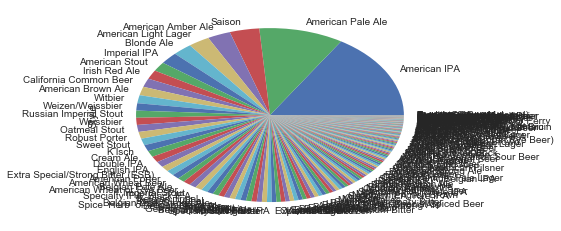

In [176]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
beer_clean['Style'].value_counts().plot(kind='pie')

### >> We can see that the top 2 of styles are American IPA and American Pale Ale, while other ones can not be clearly seen by a pie chart. And because it has more than 170 styles, we should come up a better idea to show it. 

In [177]:
# List top ten of beer styles and their numbers
beer_clean['Style'].value_counts()[0:10]

American IPA              10412
American Pale Ale          6586
Saison                     2317
American Amber Ale         1795
American Light Lager       1667
Blonde Ale                 1518
Imperial IPA               1419
American Stout             1112
Irish Red Ale              1081
California Common Beer     1032
Name: Style, dtype: int64

### >> We can see that the top 10 styles are American IPA(10412), American Pale Ale(6586), Saison(2317), American Amber Ale(1795),American Light Lager(1667), Blonde Ale(1518), Imperial IPA(1419), American Stout(1112), Irish Red Ale(1081), and California Common Beer(1032). 

In [178]:
# List least ten of beer styles and their numbers
beer_clean['Style'].value_counts()[-11:-1]

Piwo Grodziskie                 14
Kellerbier: Amber Kellerbier    14
Pre-Prohibition Porter          11
Specialty Wood-Aged Beer        10
London Brown Ale                 8
New England Cider                7
Lichtenhainer                    6
Apple Wine                       6
Pyment (Grape Melomel)           4
Traditional Perry                2
Name: Style, dtype: int64

### >> We can see that the least popular 10 styles are Kellerbier: Amber Kellerbier(14), Metheglin(14), Pre-Prohibition Porter(11), Specialty Wood-Aged Beer(10), London Brown Ale(8), New England Cider(7), Lichtenhainer(6), Apple Win(6), Pyment(Grape Melomel)(4) and Traditional Perry(2). 

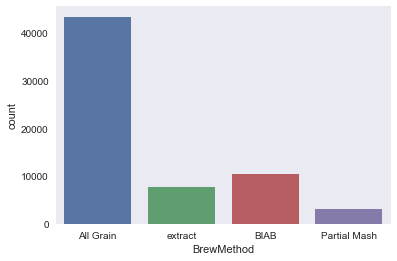

In [179]:
# Generate a bar chart that shows different brew methods using seaborn
hh = sns.countplot(x='BrewMethod', data = beer_clean)

### >> We can see that All Grain is the most popular method, and it is a leading one, much more than other three methods. The second and third ones are BIAB and Extract. And the least used method is Partial Mash. 

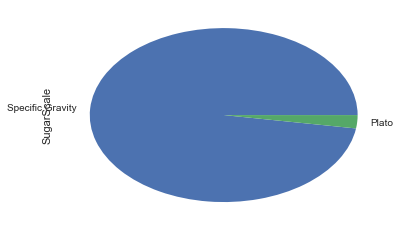

In [180]:
# Generate a pie chart seeing SugarScale
beer_clean['SugarScale'].value_counts().plot(kind='pie')

### >> We can see that most of the SugarScale is Specific Gravity, and only a few is Plato. 
Understanding SugarScale: One of the most important measurements in brewing is the “sugar” content of wort and, later, beer. Brewers, especially home brewers, commonly use specific gravity (1.xxx) or gravity points to express extract content without first converting to Plato. A quick and dirty conversion between specific gravity and Plato is Plato = gravity points / 4. This formula works well up to a specific gravity of 1.060 where the error approaches 2%. The relationship between specific gravity (density) and extract content (Plato) can also be used to calculate the volume increase caused by the dissolved extract. 

## 4.2 Distributions on SugarScale

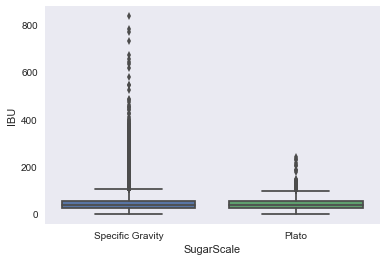

In [181]:
#Shows the quartiles of distribution along with extreme values using seaborn
sns.boxplot(x="SugarScale", y='IBU', data = beer_clean)

### >> From the box plot, we can see more clearly that the beer which uses Specific Gravity SugarScale has a larger range of IBU, and is generally bitter than plato. 

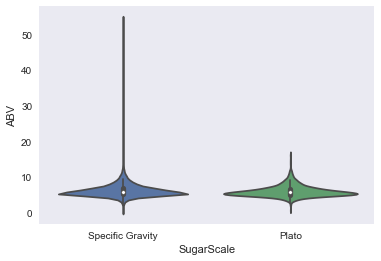

In [182]:
sns.violinplot(x="SugarScale", y='ABV', data = beer_clean)

### >> From the box plot, we can see more clearly that the beer which uses Specific Gravity SugarScale has a larger range of ABV. 

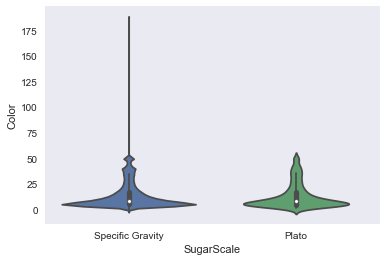

In [183]:
sns.violinplot(x="SugarScale", y='Color', data = beer_clean)

### >> From the box plot, we can see more clearly that the beer which uses Specific Gravity SugarScale has a larger range of Color

## 4.3 Distributions on BrewMethod

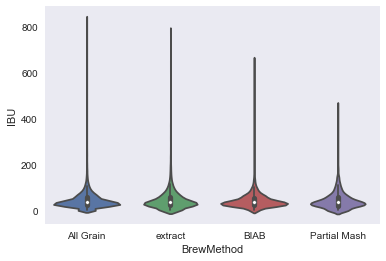

In [184]:
#violin plot
sns.violinplot(x="BrewMethod", y='IBU', data = beer_clean)

### >> From the violin plot, we can see more clearly that All Grain method has the largest range of bitterness, while Partial Mash has the smallest range of bitterness. And All Grain and BIAB are 'fatter' than other two, which shows that they have more concentrated in a smaller range. 

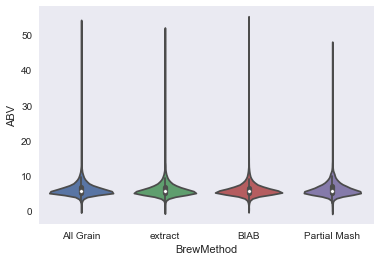

In [185]:
sns.violinplot(x="BrewMethod", y='ABV', data = beer_clean)

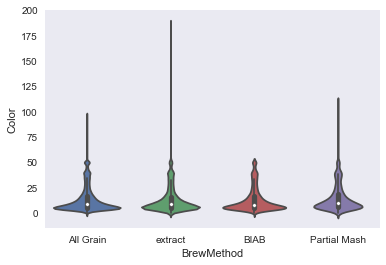

In [186]:
sns.violinplot(x="BrewMethod", y='Color', data = beer_clean)

### >> We can see that the Extract method has the darkest color in beer, and the BIAB has the lightest color in general. 

## 4.4 Descriptive analysis

In [187]:
beer_clean.describe(include='all')

,BeerID,Name,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,Efficiency,SugarScale,BrewMethod,Style
count,64697.000000,64697,64697,64697.000000,64697.000000,64697.000000,64697.000000,64697.000000,64697.000000,64697.000000,64697.000000,64697,64697,64697
unique,NaN,52297,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,175
top,NaN,Awesome Recipe,20.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Specific Gravity,All Grain,American IPA
freq,NaN,1140,14873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63108,43432,10412
mean,32802.240150,NaN,NaN,1.390144,1.073314,6.143763,44.270426,13.436946,42.691874,65.208186,66.277019,NaN,NaN,NaN
std,18910.106718,NaN,NaN,2.143186,0.418081,1.866236,36.281466,11.886891,148.832387,15.092152,14.093393,NaN,NaN,NaN
min,1.000000,NaN,NaN,1.000000,0.425441,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,16460.000000,NaN,NaN,1.051000,1.011000,5.080000,23.490000,5.220000,20.820000,60.000000,65.000000,NaN,NaN,NaN
50%,32851.000000,NaN,NaN,1.058000,1.013000,5.790000,35.860000,8.530000,27.440000,60.000000,70.000000,NaN,NaN,NaN
75%,49171.000000,NaN,NaN,1.069000,1.017000,6.840000,56.530000,16.870000,30.000000,60.000000,75.000000,NaN,NaN,NaN


### >> From descriptive data, we can find min and mas in every attribute, as well as mean, 25%, 50% and 75% value and so on. 

## 4.5 Correlation analysis

### 4.5.1 With the data we have oberserved, let's see the correlations between Style, OG, FG, ABV, IBU, and Color.  

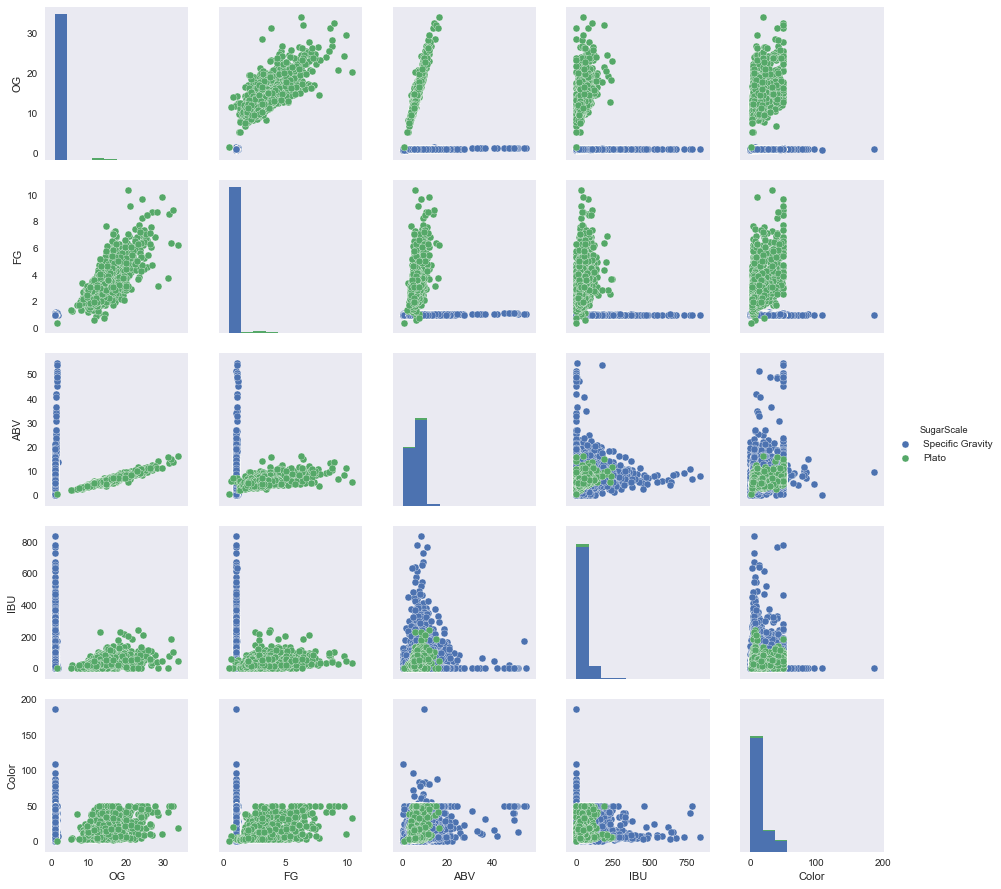

In [188]:
# create specific df that only contains the fields we're interested in
correlation = beer_clean.loc[:, ['Style','OG','FG','ABV','IBU','Color','SugarScale']]

# use the pairplot to find correlations between all the columns that we are interested in
sns.pairplot(data=correlation, hue = 'SugarScale')
plt.show()

### >> We can see that the SugarScale is a big influence towards different correlations. 

### >> We can assume these correlations in Plato Groups: 
ABV ~ OG ~ FG
IBU ~ OG ~ FG
Color ~ OG ~ FG
### >> We can assume these correlations in Specific Gravity Groups: 
ABV ~ IBU

### 4.5.2 Color ~ Bitterness/ABV

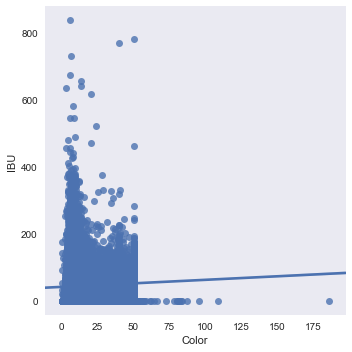

In [189]:
sns.lmplot(x="Color", y="IBU", data=beer_clean)

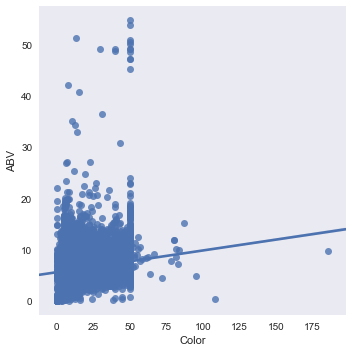

In [170]:
sns.lmplot(x="Color", y="ABV", data=beer_clean)

### 4.5.3 OG/FG ~ ABV

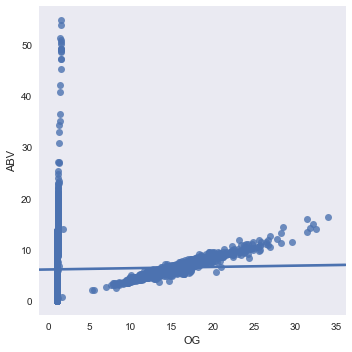

In [171]:
sns.lmplot(x="OG", y="ABV", data=beer_clean)

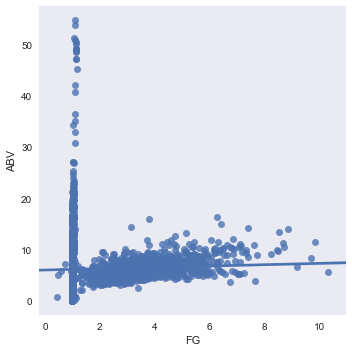

In [172]:
sns.lmplot(x="FG", y="ABV", data=beer_clean)

## 4.4 Bitterness ~ ABV/OG

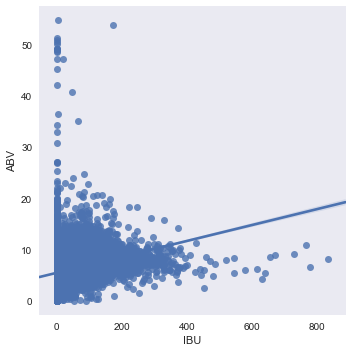

In [173]:
sns.lmplot(x="IBU", y="ABV", data=beer_clean)

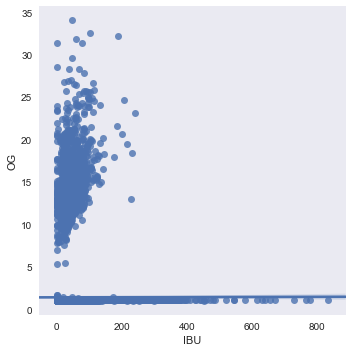

In [174]:
sns.lmplot(x="IBU", y="OG", data=beer_clean)

## 4.5 Predictive Analysis

In [190]:
from patsy import dmatrices
y,X = dmatrices('Efficiency ~ OG', data=beer_clean)
print("y:{}".format(y.shape))
print("X:{}".format(X.shape))

y:(64697, 1)
X:(64697, 2)


In [202]:
import sklearn
from sklearn import linear_model
model = linear_model.LinearRegression(fit_intercept=False)
res = model.fit(X, y)

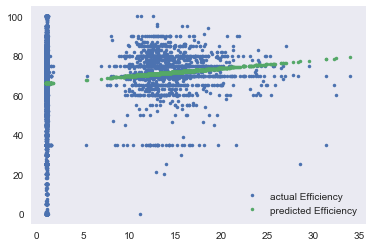

In [192]:
plt.plot(X[:,1], y, '.')
plt.plot(X[:,1], model.predict(X), '.')
plt.legend(['actual Efficiency', 'predicted Efficiency'])

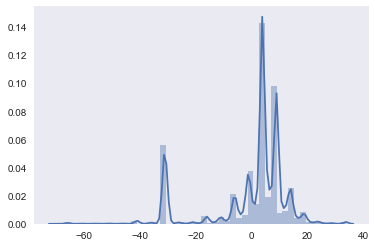

In [193]:
sns.distplot(y - model.predict(X))

In [203]:
from sklearn import ensemble
model = sklearn.ensemble.RandomForestRegressor()
model.fit(X,y)

/Users/linliangli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

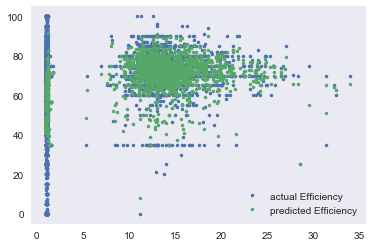

In [204]:
plt.plot(X[:,1], y, '.')
plt.plot(X[:,1], model.predict(X), '.')
plt.legend(['actual Efficiency', 'predicted Efficiency'])

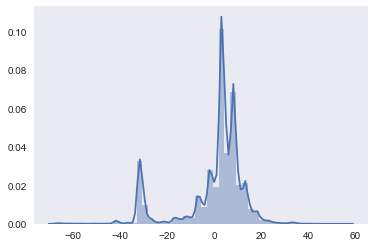

In [205]:
sns.distplot(y.ravel() - model.predict(X))

/Users/linliangli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


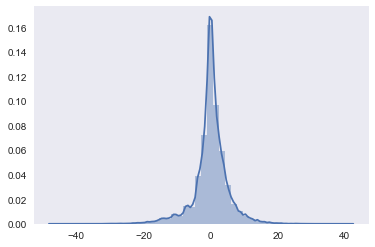

In [206]:
y,X = dmatrices('Efficiency ~ OG + FG +ABV+IBU+Color+BoilSize+BoilTime', data=beer_clean)
model = sklearn.ensemble.RandomForestRegressor()
model.fit(X,y)
sns.distplot(y.ravel() - model.predict(X))

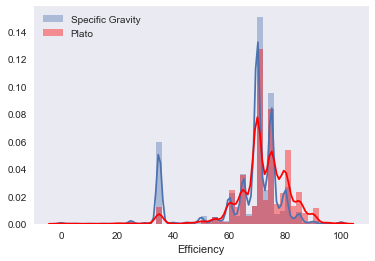

In [207]:
import statsmodels
import statsmodels.stats as stats
specific_Efficiency = beer_clean.loc[beer_clean['SugarScale']=='Specific Gravity', 'Efficiency']
plato_Efficiency=beer_clean.loc[beer_clean['SugarScale']=='Plato', 'Efficiency']
sns.distplot(specific_Efficiency)
sns.distplot(plato_Efficiency, color='red')
plt.legend(['Specific Gravity', 'Plato'])

In [208]:
from statsmodels.stats import weightstats as weightstats
weightstats.ttest_ind(specific_Efficiency, plato_Efficiency, alternative='larger')

(-16.021607542694284, 1.0, 64695.0)

In [209]:
weightstats.ztest(specific_Efficiency, plato_Efficiency)

(-16.021607542694333, 9.028562323397487e-58)